# Homework 6, Part 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Questions to answer:

- 2009 Iranian election MSE: ___
- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: ___
- Quantity of MSEs smaller than the 2009 Iranian election MSE: ___
- 2009 Iranian election null hypothesis rejection level p: ___
- 2008 United States election MSE: ___
- Quantity of MSEs larger than or equal to the 2008 United States election MSE: ___
- Quantity of MSEs smaller than the 2008 United States election MSE: ___
- 2008 United States election null hypothesis rejection level p: ___

Functionsn to write:

- extract_election_vote_counts(filename, column_names)
- ones_and_tens_digit_histogram(numbers)
- plot_iranian_least_digits_histogram(histogram)
- plot_distribution_by_sample_size()
- mean_squared_error(numbers1, numbers2)
- calculate_mse_with_uniform(histogram)
- compare_iranian_mse_to_samples(mse)

## Problem 1: Read and clean Iranian election data

Write a function called extract_election_vote_counts that takes a filename and a list of names of columns to extract vote counts from. It should return a list of all of the vote counts from the respective rows.

In [4]:
test = pd.read_csv('homework6/election-iran-2009.csv', usecols=["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"])
test.head()

,Ahmadinejad,Rezai,Karrubi,Mousavi
0,"1,131,111","16,920","7,246","837,858"
1,"623,946","12,199","21,609","656,508"
2,"325,911","6,578","2,319","302,825"
3,"1,799,255","51,788","14,579","746,697"
4,"199,654","5,221","7,471","96,826"


In [73]:
test.dtypes

Ahmadinejad    object
Rezai          object
Karrubi        object
Mousavi        object
dtype: object

In [5]:
for col in test.columns:
    test[col] =  test[col].str.replace(',', '')
    test[col] = pd.to_numeric(test[col])

In [75]:
test.head()

,Ahmadinejad,Rezai,Karrubi,Mousavi
0,1131111,16920,7246,837858
1,623946,12199,21609,656508
2,325911,6578,2319,302825
3,1799255,51788,14579,746697
4,199654,5221,7471,96826


In [76]:
test.dtypes

Ahmadinejad    int64
Rezai          int64
Karrubi        int64
Mousavi        int64
dtype: object

In [79]:
test[col]

0      837858
1      656508
2      302825
3      746697
4       96826
5      177268
6     3371523
7      106099
8       90363
9      884570
10     113218
11     552636
12     126561
13      77754
14     507946
15     706764
16     177542
17     148467
18     261772
19     318250
20     374188
21      98937
22     325806
23     453806
24     219156
25     585373
26     190349
27     241988
28     218481
29     255799
Name: Mousavi, dtype: int64

In [6]:
vote_cts = pd.DataFrame()
for col in test.columns:
    vote_cts = pd.concat([vote_cts, test[col]])
vote_cts.rename({0:'counts'}, axis=1, inplace=True)
vote_cts.head()

,counts
0,1131111.0
1,623946.0
2,325911.0
3,1799255.0
4,199654.0


In [106]:
vote_cts.shape

(120, 1)

In [7]:
def extract_election_vote_counts(filename, column_names):
    df = pd.read_csv(filename, usecols=column_names)
    for col in df.columns:
        df[col] =  df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col])
    vote_cts = pd.DataFrame()
    for col in df.columns:
        vote_cts = pd.concat([vote_cts, df[col]])
    vote_cts.rename(columns={0:'count'}, axis=1, inplace=True)
    return vote_cts

## Problem 2: Make a histogram

Write a function ones_and_tens_digit_histogram that takes as input a list of numbers and produces as output a list of 10 numbers. Each element of the result indicates the frequency with which that digit appeared in the ones place or the tens place in the input.

In [101]:
list(vote_cts['counts'])

[1131111.0,
 623946.0,
 325911.0,
 1799255.0,
 199654.0,
 299357.0,
 3819495.0,
 359578.0,
 285984.0,
 2214801.0,
 341104.0,
 1303129.0,
 444480.0,
 295177.0,
 450269.0,
 1758026.0,
 498061.0,
 422457.0,
 315689.0,
 1160446.0,
 573568.0,
 253962.0,
 515211.0,
 998573.0,
 677829.0,
 1289257.0,
 572988.0,
 482990.0,
 765723.0,
 337178.0,
 16920.0,
 12199.0,
 6578.0,
 51788.0,
 5221.0,
 7608.0,
 147487.0,
 22689.0,
 3962.0,
 44809.0,
 4129.0,
 139124.0,
 7276.0,
 4440.0,
 6616.0,
 23871.0,
 7978.0,
 16297.0,
 7140.0,
 12016.0,
 11258.0,
 8542.0,
 5987.0,
 12022.0,
 14920.0,
 19587.0,
 10057.0,
 7237.0,
 13117.0,
 8406.0,
 7246.0,
 21609.0,
 2319.0,
 14579.0,
 7471.0,
 3563.0,
 67334.0,
 4127.0,
 928.0,
 13561.0,
 2478.0,
 15934.0,
 2223.0,
 2147.0,
 12504.0,
 16277.0,
 2690.0,
 2314.0,
 13862.0,
 4977.0,
 10798.0,
 4274.0,
 10097.0,
 7183.0,
 44036.0,
 10050.0,
 4675.0,
 5126.0,
 12032.0,
 2565.0,
 837858.0,
 656508.0,
 302825.0,
 746697.0,
 96826.0,
 177268.0,
 3371523.0,
 106099.0,
 903

In [11]:
vote_digits = (vote_cts%10).astype(int)
vote_digits

,counts
0,1
1,6
2,1
3,5
4,4
...,...
25,3
26,9
27,8
28,1


In [111]:
vote_sec_digits = (vote_cts%100).astype(int)
vote_sec_digits

,counts
0,11
1,46
2,11
3,55
4,54
...,...
25,73
26,49
27,88
28,81


In [13]:
vote_sec_digits = (np.floor(vote_cts%100)/10).astype(int)
vote_sec_digits

,counts
0,1
1,4
2,1
3,5
4,5
...,...
25,7
26,4
27,8
28,8


In [45]:
test.shape

(30, 6)

In [14]:
vote_test = vote_digits.append(vote_sec_digits, ignore_index=True)
vote_test

,counts
0,1
1,6
2,1
3,5
4,4
...,...
235,7
236,4
237,8
238,8


In [15]:
freq_test = pd.crosstab(vote_digits['counts'].append(vote_sec_digits['counts'], ignore_index=True), columns=['frequency'], normalize=True)
freq_test

col_0,frequency
counts,
0,0.083333
1,0.083333
2,0.104167
3,0.062500
4,0.087500
5,0.070833
6,0.125000
7,0.154167
8,0.129167


In [8]:
def ones_and_tens_digit_histogram(numbers):
    last_digits = numbers%10
    sec_last_digits = (np.floor(numbers%100)/10).astype(int)
    return pd.crosstab(last_digits.append(sec_last_digits, ignore_index=True), columns=['frequency'], normalize=True)

## Problem 3: Plot election data

Write a function called `plot_iranian_least_digits_histogram` that takes a histogram (as created by ones_and_tens_digit_histogram) and graphs the frequencies of the ones and tens digits for the Iranian election data. Save your plot to a file named iran-digits.png using pyplot.savefig.

In [ ]:
plot_iranian_least_digits_histogram(histogram)

In [120]:
freq_test.sum()

col_0
frequency    1.0
dtype: float64

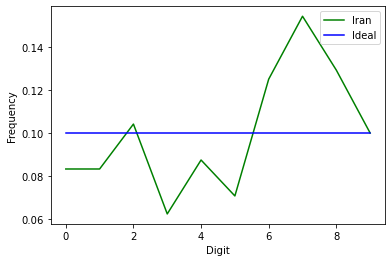

In [16]:
plt.plot(freq_test, 'g', label='Iran')
plt.plot([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10], 'b', label='Ideal')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

In [17]:
def plot_iranian_least_digits_histogram(histogram):
    plt.plot(histogram, 'g', label='Iran')
    plt.plot([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10], 'b', label='Ideal')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.savefig('homework6/iran-digits.png')
    plt.show()

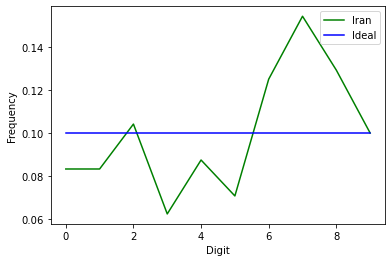

In [123]:
plot_iranian_least_digits_histogram(freq_test)

## Problem 4: Smaller samples have more variation

Write a function called `plot_distribution_by_sample_size`. This function creates 5 different-sized collections of random numbers. Then, it plots the digit histograms for each of those collections. Your function should save your plot as `random-digits.png`.

In [19]:
rand_lst = []
for x in range(10):
    rand_lst.append(random.randint(0, 99))
rand_lst

[3, 66, 73, 59, 52, 58, 24, 33, 65, 90]

In [132]:
pd.Series(rand_lst)

0    95
1    53
2    94
3    87
4    24
5     9
6    46
7    58
8    79
9    82
dtype: int64

In [20]:
ones_and_tens_digit_histogram(pd.Series(rand_lst))

col_0,frequency
row_0,
0,0.10
2,0.10
3,0.20
4,0.05
5,0.20
6,0.15
7,0.05
8,0.05
9,0.10


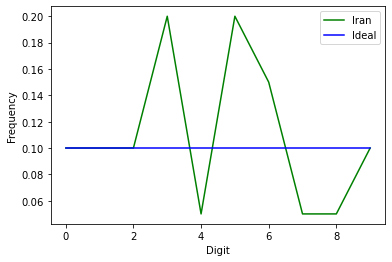

In [21]:
plot_iranian_least_digits_histogram(ones_and_tens_digit_histogram(pd.Series(rand_lst)))

In [22]:
def plot_iranian_least_digits_histogram(histogram, color, size):
    plt.axhline(y=0.10, color='b', label='Ideal')
    plt.plot(histogram, color, label=f'{size} random numbers')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
#     plt.savefig('homework6/iran-digits.png')
    plt.title('Distrubution of last two digits')
    plt.show()

def random_nbr_lst(size):
    rand_lst = []
    for x in range(size):
        rand_lst.append(random.randint(0, 99))
    return rand_lst
    
def plot_distribution_by_sample_size(size, color):
    rand_lst = random_nbr_lst(size)
    freq = ones_and_tens_digit_histogram(pd.Series(rand_lst))
    plot_iranian_least_digits_histogram(freq, color, size)

In [23]:
lst_lengths = [10, 50, 100, 1000, 10000]
color_lst = ['g','r','c','m','y','k','w']

In [24]:
for i, size in enumerate(lst_lengths):
    print(i, size, color_lst[i])

0 10 g
1 50 r
2 100 c
3 1000 m
4 10000 y


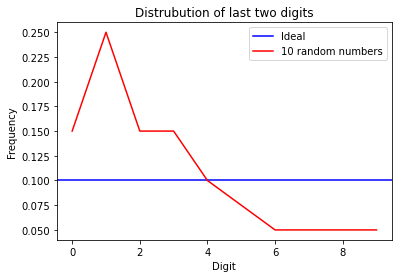

In [25]:
plot_distribution_by_sample_size(10, 'r')

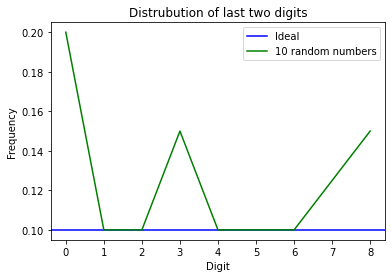

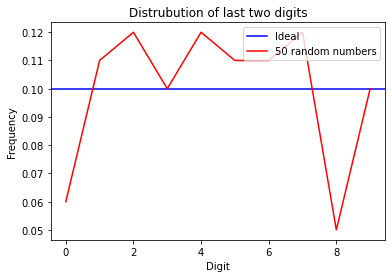

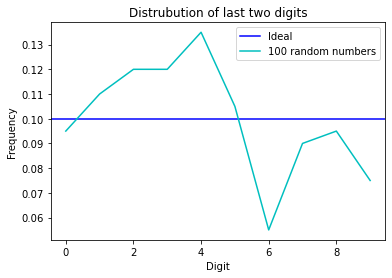

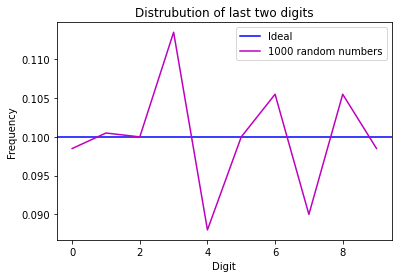

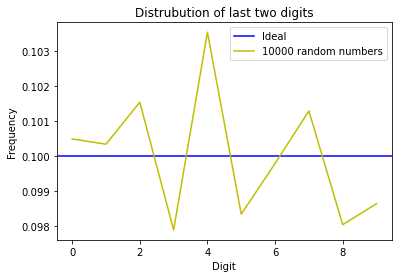

In [26]:
for i, size in enumerate(lst_lengths):
    plot_distribution_by_sample_size(size, color_lst[i])

# Problem 5: Comparing variation of samples

Write a function mean_squared_error that, given two lists of numbers, computes the mean squared error between the lists.

In [ ]:
(1-2)2 + (4-3)2 + (9-4)2

In [167]:
a = [1,2,3,4]
b = [4,3,2,1]

In [172]:
np.subtract(a,b)

array([-3, -1,  1,  3])

In [176]:
np.subtract(a,b)**2

array([9, 1, 1, 9], dtype=int32)

In [175]:
sum(np.subtract(a,b)**2)

20

In [27]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

In [28]:
assert mean_squared_error([1, 4, 9], [6, 5, 4]) == 51

In [29]:
mean_squared_error([1, 4, 9], [6, 5, 4])

51

# Problem 6: Comparing variation of samples

Augment your program with a function called `calculate_mse_with_uniform` that takes a histogram (as created by ones_and_tens_digit_histogram) and returns the mean squared error of the given histogram with the uniform distribution. Invoking `calculate_mse_with_uniform` with the the Iranian election results histogram (for the ones and tens digits) should return the result 0.00739583333333, or approximately 0.007.

> `calculate_mse_with_uniform(histogram)` == 0.00739583333333

This number on its own does not mean anything — we don't know whether it is unusually low, or unusually high, or about average. To find out, we need to compare it to similarly-sized sets.

In a function called `compare_iranian_mse_to_samples` take the Iranian MSE (as computed by `calculate_mse_with_uniform`) and compare it to the MSE to the uniform distribution for 10000 groups of random numbers, where each group is the same size as the Iranian election data (120 numbers). You will only use the last two digits of the random numbers.

Your function should determine where the passed in MSE (For our sample of the 2009 Iranian election data, this is ~0.007) appears relative to the computed MSE samples. In other words, determine how many of the random MSEs are larger than or equal to the Iran MSE, and how many of the random MSEs are smaller than the Iran MSE. Print these values. This function should return `None`. With each run of your program, you should expect a slightly different outcome from this function call.

> `compare_iranian_mse_to_samples(0.00739583333333)`
- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: ___
- Quantity of MSEs smaller than the 2009 Iranian election MSE: ___
- 2009 Iranian election null hypothesis rejection level p: ___

In [188]:
freq_test['frequency'].tolist()

[0.08333333333333333,
 0.08333333333333333,
 0.10416666666666667,
 0.0625,
 0.0875,
 0.07083333333333333,
 0.125,
 0.15416666666666667,
 0.12916666666666668,
 0.1]

In [185]:
len(freq_test)

10

In [189]:
[0.1]*len(freq_test)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [30]:
def calculate_mse_with_uniform(histogram):
    uniform_distro = [0.1]*len(histogram)
    return mean_squared_error(histogram, uniform_distro)

In [31]:
calculate_mse_with_uniform(freq_test['frequency'].tolist())

0.007395833333333335

In a function called `compare_iranian_mse_to_samples` take the Iranian MSE (as computed by `calculate_mse_with_uniform`) and compare it to the MSE to the uniform distribution for 10000 groups of random numbers, where each group is the same size as the Iranian election data (120 numbers). You will only use the last two digits of the random numbers.

Your function should determine where the passed in MSE (For our sample of the 2009 Iranian election data, this is ~0.007) appears relative to the computed MSE samples. In other words, determine how many of the random MSEs are larger than or equal to the Iran MSE, and how many of the random MSEs are smaller than the Iran MSE. Print these values.

Psudocode

- mse of Iran with Uniform => 0.007
- 120 random numbers x 10,000
- count if mse is >= or < than Iran MSE
- print counts
- print count ratios

In [30]:
def calculate_mse_with_uniform(histogram):
    uniform_distro = [0.1]*len(histogram)
    return mean_squared_error(histogram, uniform_distro)

In [27]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

In [ ]:
def random_nbr_lst(size):
    rand_lst = []
    for x in range(size):
        rand_lst.append(random.randint(0, 99))
    return rand_lst

In [53]:
calculate_mse_with_uniform(ones_and_tens_digit_histogram(pd.Series(random_nbr_lst(120)))['frequency'].tolist())

0.0021527777777777786

In [160]:
def compare_iranian_mse_to_samples(samp_size):
    i_mse = calculate_mse_with_uniform(freq_test['frequency'].tolist())
    g_or_e = 0
    l = 0
    for i in range(samp_size):
        histogram = ones_and_tens_digit_histogram(pd.Series(random_nbr_lst(120)))
        r_mse = calculate_mse_with_uniform(histogram['frequency'].tolist())
        if r_mse < i_mse:
            l += 1
        else:
            g_or_e += 1
    print(f'Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: {g_or_e}')
    print(f'Quantity of MSEs smaller than the 2009 Iranian election MSE: {l}')
    print(f'2009 Iranian election null hypothesis rejection level p: {g_or_e/samp_size}')

In [161]:
compare_iranian_mse_to_samples(10000)

KeyError: 'counts'

# Problem 7: Interpret your results

Interpret your results in answers.txt, using the ideas and vocabulary from the Interpreting Statistical Results section. State whether the data suggest that the Iran election results were tampered with before being reported to the press. Briefly justify your answer.

In [159]:
9605/10000

0.9605

Null hypothesis: the Iran election results were not fraudulent.

You should pay attention to the % of MSEs that the Iranian election result is greater than -> We want the quantity of MSEs that were smaller than the Iran election MSE.

We reject the null hypothesis with a p value of 0.9605. There was only 0.095% confidence that the result was fradulent.

In [158]:
1-0.0395

0.9605

# Problem 8: Other datasets

Update your program to include calculations for the United States 2008 presidential election in addition to the 2009 Iranian election. Use the following list of candidates:

> us_2008_candidates  = ["Obama", "McCain", "Nader", "Barr", "Baldwin", "McKinney"]

Additionally, update your program to include:

- 2009 Iranian election MSE: ___
- Quantity of MSEs larger than or equal to the 2009 Iranian election MSE: ___
- Quantity of MSEs smaller than the 2009 Iranian election MSE: ___
- 2009 Iranian election null hypothesis rejection level p: ___
- 2008 United States election MSE: ___
- Quantity of MSEs larger than or equal to the 2008 United States election MSE: ___
- Quantity of MSEs smaller than the 2008 United States election MSE: ___
- 2008 United States election null hypothesis rejection level p: ___

You do not need to produce graphs or plots for the US election — just the textual output.

In answers.txt, state whether you can reject that hypothesis, and with what confidence. Briefly justify your answer.

In [139]:
def extract_election_vote_counts(filename, column_names):
    df = pd.read_csv(filename, usecols=column_names)
    for col in df.columns:
        df[col] =  df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col])
    vote_cts = pd.DataFrame()
    for col in df.columns:
        vote_cts = pd.concat([vote_cts, df[col]])
    vote_cts.rename(columns={0:'counts'}, inplace=True)
    return vote_cts.dropna()

In [140]:
def ones_and_tens_digit_histogram(numbers):
    last_digits = numbers%10
    sec_last_digits = (np.floor(numbers%100)/10).astype(int)
    return pd.crosstab(last_digits['counts'].append(sec_last_digits['counts'], ignore_index=True), columns=['frequency'], normalize=True)

In [27]:
def mean_squared_error(lst1, lst2):
    return sum(np.subtract(lst1,lst2)**2)

In [30]:
def calculate_mse_with_uniform(histogram):
    uniform_distro = [0.1]*len(histogram)
    return mean_squared_error(histogram, uniform_distro)

In [ ]:
def random_nbr_lst(size):
    rand_lst = []
    for x in range(size):
        rand_lst.append(random.randint(0, 99))
    return rand_lst

In [156]:
def compare_mse_to_samples(filename, column_names, samp_size):
    data = extract_election_vote_counts(filename, column_names)
    s_histogram = ones_and_tens_digit_histogram(data)
    s_mse = calculate_mse_with_uniform(s_histogram['frequency'].tolist())
    g_or_e = 0
    l = 0
    for i in range(samp_size):
        r_histogram = ones_and_tens_digit_histogram(pd.DataFrame(random_nbr_lst(120), columns=['counts']))
        r_mse = calculate_mse_with_uniform(r_histogram['frequency'].tolist())
        if r_mse < s_mse:
            l += 1
        else:
            g_or_e += 1
    year = re.split('-|\.', filename)[-2]
    country = re.split('-|\.', filename)[-3].capitalize()
    print(f'{year} {country} election MSE: {s_mse}')
    print(f'Quantity of MSEs larger than or equal to the {year} {country} election MSE: {g_or_e}')
    print(f'Quantity of MSEs smaller than the {year} {country} election MSE: {l}')
    print(f'{year} {country} election null hypothesis rejection level p: {g_or_e/samp_size}')

In [153]:
compare_mse_to_samples('homework6/election-us-2008.csv', ["Obama", "McCain", "Nader", "Barr", "Baldwin", "McKinney"], 10000)

Quantity of MSEs larger than or equal to the 2008 Us election MSE: 9481
Quantity of MSEs smaller than the 2008 Us election MSE: 519
2008 Us election null hypothesis rejection level p: 0.0519


In [154]:
compare_mse_to_samples('homework6/election-iran-2009.csv', ["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"], 10000)

Quantity of MSEs larger than or equal to the 2009 Iran election MSE: 428
Quantity of MSEs smaller than the 2009 Iran election MSE: 9572
2009 Iran election null hypothesis rejection level p: 0.9572


In [157]:
compare_mse_to_samples('homework6/election-iran-2009.csv', ["Ahmadinejad", "Rezai", "Karrubi", "Mousavi"], 10000)
compare_mse_to_samples('homework6/election-us-2008.csv', ["Obama", "McCain", "Nader", "Barr", "Baldwin", "McKinney"], 10000)

2009 Iran election MSE: 0.007395833333333335
Quantity of MSEs larger than or equal to the 2009 Iran election MSE: 365
Quantity of MSEs smaller than the 2009 Iran election MSE: 9635
2009 Iran election null hypothesis rejection level p: 0.0365
2008 Us election MSE: 0.001410025876058068
Quantity of MSEs larger than or equal to the 2008 Us election MSE: 9450
Quantity of MSEs smaller than the 2008 Us election MSE: 550
2008 Us election null hypothesis rejection level p: 0.945
